<a href="https://colab.research.google.com/github/SagarRathod07/playstore-apps-data-analysis/blob/main/Play_Store_App_Review_Analysis_Capstone_Project(sagar_rathod).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. 

## At first we shall import pandas, numpy,matplotlib and seaborn
loading dataset to colab



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from numpy import median,mean

In [ ]:
from google.colab import data_table
data_table.enable_dataframe_formatter()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
playstore_data_path = "/content/drive/MyDrive/ Play Store Data.csv"
user_review_path ="/content/drive/MyDrive/Copy of User Reviews.csv"


# here we have uploaded the dataset to colab

In [ ]:
# loding data 

playstore_df = pd.read_csv(playstore_data_path)
user_review_df = pd.read_csv(user_review_path)

# **Description of Dataset (first 10 raws)**

In [ ]:
playstore_df.head(10)

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   
5                         Paper flowers instructions  ART_AND_DESIGN     4.4   
6            Smoke Effect Photo Maker - Smoke Editor  ART_AND_DESIGN     3.8   
7                                   Infinite Painter  ART_AND_DESIGN     4.1   
8                               Garden Coloring Book  ART_AND_DESIGN     4.4   
9                      Kids Paint Free - Drawing Fun  ART_AND_DESIGN     4.7   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   
5     167  5.6M      50,000+  Free     0       Everyone   
6     178   19M      50,000+  Free     0       Everyone   
7   36815   29M   1,000,000+  Free     0       Everyone   
8   13791   33M   1,000,000+  Free     0       Everyone   
9     121  3.1M      10,000+  Free     0       Everyone   

                      Genres        Last Updated         Current Ver  \
0               Art & Design     January 7, 2018               1.0.0   
1  Art & Design;Pretend Play    January 15, 2018               2.0.0   
2               Art & Design      August 1, 2018               1.2.4   
3               Art & Design        June 8, 2018  Varies with device   
4    Art & Design;Creativity       June 20, 2018                 1.1   
5               Art & Design      March 26, 2017                 1.0   
6               Art & Design      April 26, 2018                 1.1   
7               Art & Design       June 14, 2018            6.1.61.1   
8               Art & Design  September 20, 2017               2.9.2   
9    Art & Design;Creativity        July 3, 2018                 2.8   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up  
5    2.3 and up  
6  4.0.3 and up  
7    4.2 and up  
8    3.0 and up  
9  4.0.3 and up

or

In [ ]:
data_table.DataTable(user_review_df, include_index=True, num_rows_per_page=10)

In [ ]:
playstore_df.info()


# to get how many types of information is given to the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
playstore_df.describe()


Rating
count  9367.000000
mean      4.193338
std       0.537431
min       1.000000
25%       4.000000
50%       4.300000
75%       4.500000
max      19.000000

In [ ]:
playstore_df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

# **DATA CLEANING |**

### Null values are not usefull to getting insights


1.   Dropping records where ratings are null, since ratings are study variable.


## **A.   checking rating column**



In [ ]:
playstore_df=playstore_df[playstore_df['Rating'].notna()]


In [ ]:
playstore_df.isnull().sum()
# here we've created "playstore_df" variable , just to know the rating null values after removing it.
# or we can check it by using 'playstore_df[playstore_df["Rating"].isna()]'

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

### **B** - **Cheking Column " Android Ver."**





In [ ]:
playstore_df[playstore_df["Android Ver"].isna()]
# cheking null values for android ver column

App         Category  Rating  \
4453                    [substratum] Vacuum: P  PERSONALIZATION     4.4   
4490                      Pi Dark [substratum]  PERSONALIZATION     4.5   
10472  Life Made WI-Fi Touchscreen Photo Frame              1.9    19.0   

      Reviews    Size Installs  Type     Price Content Rating  \
4453      230     11M   1,000+  Paid     $1.49       Everyone   
4490      189    2.1M  10,000+  Free         0       Everyone   
10472    3.0M  1,000+     Free     0  Everyone            NaN   

                  Genres    Last Updated Current Ver Android Ver  
4453     Personalization   July 20, 2018         4.4         NaN  
4490     Personalization  March 27, 2018         1.1         NaN  
10472  February 11, 2018          1.0.19  4.0 and up         NaN

###`i)` here we can see that from above table that the item has missing virsions but their record has  misplaced values.
###  `ii)`Droping the third record - "**Life Made WiFi...**."

In [ ]:
playstore_df.drop(10472,inplace=True)

In [ ]:
playstore_df[playstore_df["Android Ver"].isna()]
# here we can see that the third item has been droped

App         Category  Rating Reviews  Size Installs  \
4453  [substratum] Vacuum: P  PERSONALIZATION     4.4     230   11M   1,000+   
4490    Pi Dark [substratum]  PERSONALIZATION     4.5     189  2.1M  10,000+   

      Type  Price Content Rating           Genres    Last Updated Current Ver  \
4453  Paid  $1.49       Everyone  Personalization   July 20, 2018         4.4   
4490  Free      0       Everyone  Personalization  March 27, 2018         1.1   

     Android Ver  
4453         NaN  
4490         NaN

## `iii)`Replace Remaining missing values with mode

In [ ]:
playstore_df["Android Ver"].fillna(playstore_df["Android Ver"].mode,inplace=True)

In [ ]:
playstore_df[playstore_df["Android Ver"].isna()]


Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []

In [ ]:
count_AndroidVer=pd.value_counts(playstore_df["Android Ver"], sort=True)

In [ ]:
playstore_df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       0
dtype: int64

## **`C`.** **"Current Ver"** - Replacing with most common value

In [ ]:
playstore_df["Current Ver"].fillna(playstore_df["Current Ver"].mode,inplace=True)

In [ ]:
playstore_df.isna().sum()
# Here we can see that all the null values are droped

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [ ]:
playstore_df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

# **DATA CLEANING  ||**  **:**


As we know there is multiple datatype , so we need to convert them into wanted data type to analyse the data at ease.
and also need to do some operations on needed column to analyse dataset




1.   Reviews
2.   Installs
3.   Price
2.   Last updated
5.   Size
6.   Category
7.   Type 



## **"Review column"**

In [ ]:
playstore_df = playstore_df.astype({'Reviews':int})

In [ ]:
playstore_df.dtypes
# in reviews column we just need to change datatype.
# as we can see type of reviews column is changed from object to float64

App                object
Category           object
Rating            float64
Reviews             int64
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

## **Install** **Variable** - removing "," and "+" sign , convert to interger

In [ ]:
playstore_df['Installs'] = playstore_df['Installs'].str.replace("+","").str.replace(",","").str.replace("-","")

<ipython-input-26-4ba39001d1f1>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  playstore_df['Installs'] = playstore_df['Installs'].str.replace("+","").str.replace(",","").str.replace("-","")


In [ ]:

playstore_df = playstore_df.astype({'Installs':int})

In [ ]:
playstore_df.dtypes


App                object
Category           object
Rating            float64
Reviews             int64
Size               object
Installs            int64
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

**converting remaining the other values to numeric data type** 

## **Price** **Variable** - removing $ symbol and converting value to float

In [ ]:
playstore_df.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

   Reviews  Size  Installs  Type Price Content Rating  \
0      159   19M     10000  Free     0       Everyone   
1      967   14M    500000  Free     0       Everyone   
2    87510  8.7M   5000000  Free     0       Everyone   
3   215644   25M  50000000  Free     0           Teen   
4      967  2.8M    100000  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

In [ ]:
playstore_df['Price']=playstore_df['Price'].str.replace("$","")


<ipython-input-30-7d7c11944a89>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  playstore_df['Price']=playstore_df['Price'].str.replace("$","")


In [ ]:
playstore_df=playstore_df.astype({'Price':float})

## **"last update"** column

In [ ]:
playstore_df["Last Update"]=pd.to_datetime(playstore_df['Last Updated'])
# converting this argument to the datetime datatype.

In [ ]:
playstore_df.dtypes

App                       object
Category                  object
Rating                   float64
Reviews                    int64
Size                      object
Installs                   int64
Type                      object
Price                    float64
Content Rating            object
Genres                    object
Last Updated              object
Current Ver               object
Android Ver               object
Last Update       datetime64[ns]
dtype: object

## **"Size column"**

In [ ]:

# here we need to convert size column into KB , to do that we need to multiply every value with 1024
#Removing "M", Changing Size To KB
playstore_df['Size'] = playstore_df['Size'].map(
    lambda value :
        str(int(float(value.rstrip('M')) * 1024)) if value[-1] == 'M' else value
)

# Removing "k"
playstore_df['Size'] = playstore_df['Size'].map(
    lambda value :
        str(value.rstrip('k')) if value[-1] == 'k' else value
)

# Setting "Varies with device" to NaN
playstore_df['Size'] = playstore_df['Size'].map(
    lambda value :
        np.nan if value == 'Varies with device' else value
)

In [ ]:
playstore_df["Size"].unique()

array(['19456', '14336', '8908', '25600', '2867', '5734', '29696',
       '33792', '3174', '28672', '12288', '20480', '21504', '37888',
       '2764', '5632', '17408', '39936', '31744', '4300', '23552', '6144',
       '6246', '4710', '9420', '5324', '11264', '24576', nan, '9625',
       '15360', '10240', '1228', '26624', '8192', '8089', '57344',
       '58368', '35840', '55296', '201', '3686', '5836', '8806', '2457',
       '27648', '2560', '7168', '16384', '3481', '9113', '3993', '2969',
       '38912', '32768', '5529', '18432', '1126', '2252', '4608', '10035',
       '53248', '9216', '6860', '30720', '2662', '7270', '22528', '6553',
       '3276', '8396', '5017', '9728', '5120', '6041', '13312', '74752',
       '6963', '3584', '4096', '2355', '2150', '43008', '9318', '56320',
       '23', '7475', '6656', '1536', '7680', '52224', '41984', '49152',
       '8704', '47104', '8499', '4403', '4812', '3379', '40960', '7987',
       '9011', '6758', '5222', '62464', '67584', '79', '8601', '37

In [ ]:
playstore_df['Size']=playstore_df['Size'].astype('float') 

In [ ]:
playstore_df['Size'].replace([np.nan], playstore_df['Size'].median(), inplace=True)

In [ ]:
playstore_df['Size'].isnull().sum()

0

## 6. "**Category** column"

In [ ]:
#first checking the values in the Category column.
pd.DataFrame(playstore_df['Category'].value_counts(ascending=True)).head(10)
# there was a one record with misplaced values , which we've already removed "10472"

Category
BEAUTY                    42
EVENTS                    45
PARENTING                 50
COMICS                    58
ART_AND_DESIGN            62
LIBRARIES_AND_DEMO        65
AUTO_AND_VEHICLES         73
WEATHER                   75
HOUSE_AND_HOME            76
FOOD_AND_DRINK           109

## **type** column

In [ ]:
playstore_df[playstore_df.Type.isnull()] 
#finding NaN data row

Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver, Last Update]
Index: []

In [ ]:
playstore_df.loc[9148, 'Type'] = 'Free' #Check with playstore and replace with Free 
playstore_df.loc[9148]

App                NaN
Category           NaN
Rating             NaN
Reviews            NaN
Size               NaN
Installs           NaN
Type              Free
Price              NaN
Content Rating     NaN
Genres             NaN
Last Updated       NaN
Current Ver        NaN
Android Ver        NaN
Last Update        NaT
Name: 9148, dtype: object

In [ ]:
playstore_df['Type'].unique() #Find Unique Values From Type Columns

array(['Free', 'Paid'], dtype=object)

## Intrection of reviews and installs
we wrote this code to see if there is more number of reviews than the number of installs if there is any drop if so....!!! 

In [ ]:
reviews_installs=playstore_df[playstore_df['Reviews'] > playstore_df ['Installs']]




In [ ]:
reviews_installs

App   Category  Rating  Reviews     Size  \
2454             KBA-EZ Health Guide    MEDICAL     5.0      4.0  25600.0   
4663   Alarmy (Sleep If U Can) - Pro  LIFESTYLE     4.8  10249.0  14336.0   
5917                        Ra Ga Ba       GAME     5.0      2.0  20480.0   
6700                Brick Breaker BR       GAME     5.0      7.0  19456.0   
7402            Trovami se ci riesci       GAME     5.0     11.0   6246.0   
8591                         DN Blog     SOCIAL     5.0     20.0   4300.0   
10697                        Mu.F.O.       GAME     5.0      2.0  16384.0   

       Installs  Type  Price Content Rating     Genres      Last Updated  \
2454        1.0  Free   0.00       Everyone    Medical    August 2, 2018   
4663    10000.0  Paid   2.49       Everyone  Lifestyle     July 30, 2018   
5917        1.0  Paid   1.49       Everyone     Arcade  February 8, 2017   
6700        5.0  Free   0.00       Everyone     Arcade     July 23, 2018   
7402       10.0  Free   0.00       Everyone     Arcade    March 11, 2017   
8591       10.0  Free   0.00           Teen     Social     July 23, 2018   
10697       1.0  Paid   0.99       Everyone     Arcade     March 3, 2017   

              Current Ver         Android Ver Last Update  
2454               1.0.72        4.0.3 and up  2018-08-02  
4663   Varies with device  Varies with device  2018-07-30  
5917                1.0.4          2.3 and up  2017-02-08  
6700                  1.0          4.1 and up  2018-07-23  
7402                  0.1          2.3 and up  2017-03-11  
8591                  1.0          4.0 and up  2018-07-23  
10697                 1.0          2.3 and up  2017-03-03

In [ ]:
reviews_installs.index

Int64Index([2454, 4663, 5917, 6700, 7402, 8591, 10697], dtype='int64')

In [ ]:
# Here we have droped those indexes 
playstore_df = playstore_df.drop(reviews_installs.index)

In [ ]:
playstore_df[playstore_df['Reviews'] > playstore_df ['Installs']]

Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver, Last Update]
Index: []


##A. Price column
### Identifying and handling outliers
price plot - 1

In [ ]:
paid_apps_data = playstore_df[playstore_df['Price'] > 0]

In [ ]:
sb.set(rc={'figure.figsize':(8,8)})

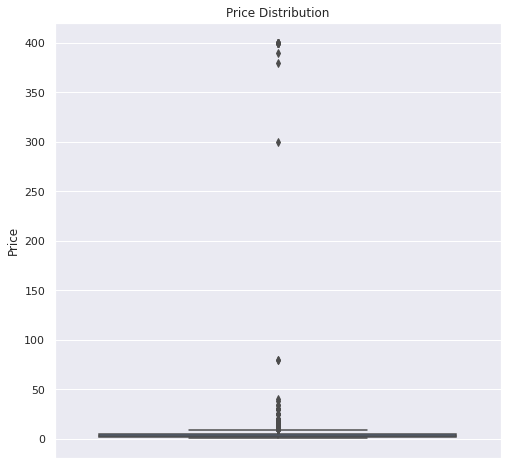

In [ ]:
# Making a suitable plot to identify outliers in price.

price_plot = sb.boxplot(y=paid_apps_data["Price"])
plt.title("Price Distribution")
plt.show()

## do you expect apps on the playstore to cost 200?

## lets checkout these cases !

price plot - 2

In [ ]:
outlie= paid_apps_data[paid_apps_data['Price']>200]

In [ ]:
paid_apps_data=paid_apps_data.drop(outlie.index)
playstore_df=playstore_df.drop(outlie.index)

<function matplotlib.pyplot.show(*args, **kw)>

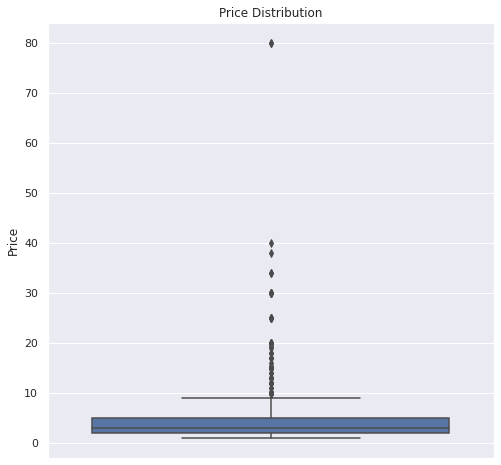

In [ ]:
paid_apps_data=sb.boxplot(y=paid_apps_data['Price'])
plt.title("Price Distribution")
plt.show 

## B. Review column

<function matplotlib.pyplot.show(*args, **kw)>

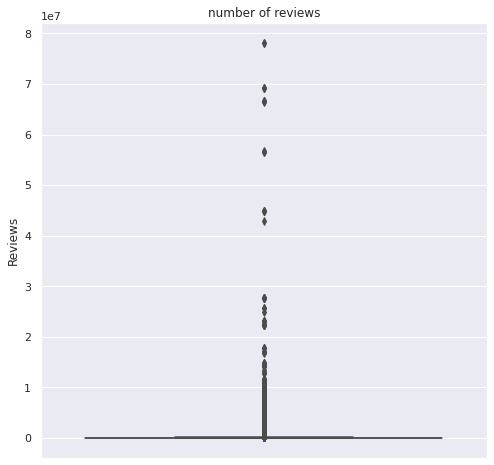

In [ ]:
# making  a box plot for review column.

sb.boxplot(y=playstore_df['Reviews'])
plt.title("number of reviews")
plt.show

In [ ]:
playstore_df["Reviews"].max()

78158306.0

In [ ]:
playstore_df["Reviews"].min()

1.0

**Limit playstore apps  with < 1 million Reviews**

In [ ]:
outlie = playstore_df[playstore_df['Reviews'] > 1000000]

In [ ]:
outlie.head()

App             Category  Rating  \
139                    Wattpad 📖 Free Books  BOOKS_AND_REFERENCE     4.6   
152                       Google Play Books  BOOKS_AND_REFERENCE     3.9   
189                             Uber Driver             BUSINESS     4.4   
194  OfficeSuite : Free Office + PDF Editor             BUSINESS     4.3   
201                  Facebook Pages Manager             BUSINESS     4.0   

       Reviews     Size      Installs  Type  Price Content Rating  \
139  2914724.0  14336.0  1.000000e+08  Free    0.0           Teen   
152  1433233.0  14336.0  1.000000e+09  Free    0.0           Teen   
189  1254730.0  14336.0  1.000000e+07  Free    0.0       Everyone   
194  1002861.0  35840.0  1.000000e+08  Free    0.0       Everyone   
201  1279184.0  14336.0  5.000000e+07  Free    0.0       Everyone   

                Genres    Last Updated         Current Ver  \
139  Books & Reference  August 1, 2018  Varies with device   
152  Books & Reference  August 3, 2018  Varies with device   
189           Business  August 3, 2018  Varies with device   
194           Business  August 2, 2018           9.7.14188   
201           Business  August 2, 2018  Varies with device   

            Android Ver Last Update  
139  Varies with device  2018-08-01  
152  Varies with device  2018-08-03  
189  Varies with device  2018-08-03  
194          4.1 and up  2018-08-02  
201  Varies with device  2018-08-02

In [ ]:
playstore_df = playstore_df.drop(outlie.index)


In [ ]:
playstore_df['Reviews'].max()

995002.0

<function matplotlib.pyplot.show(*args, **kw)>

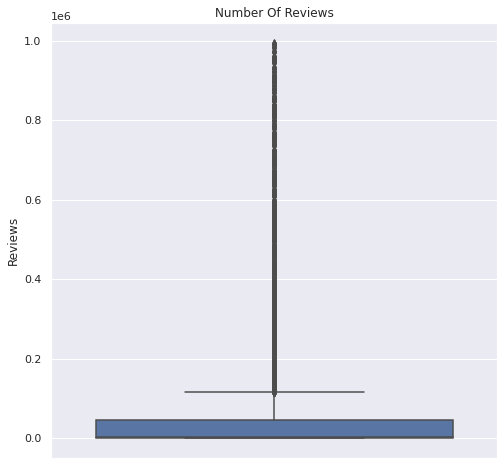

In [ ]:
plot=sb.boxplot(y=playstore_df['Reviews'])
plt.title("Number Of Reviews")
plt.show

## Installs


**what is the 95th percentile of the Installs?**

In [ ]:
inst_pr = np.percentile(playstore_df['Installs'] , 95)

**Droping records, where having a values are more than the 95th percentile**

In [ ]:
outlie = playstore_df[playstore_df['Installs'] > inst_pr]

In [ ]:
 playstore_df= playstore_df.drop(outlie.index)
 

In [ ]:
 playstore_df['Installs'].max()

1000000000.0

# **Data Analysis To Answer Business Questions**
## EDA
what is the distribution of rating like more skewed towards high/lower values ?

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


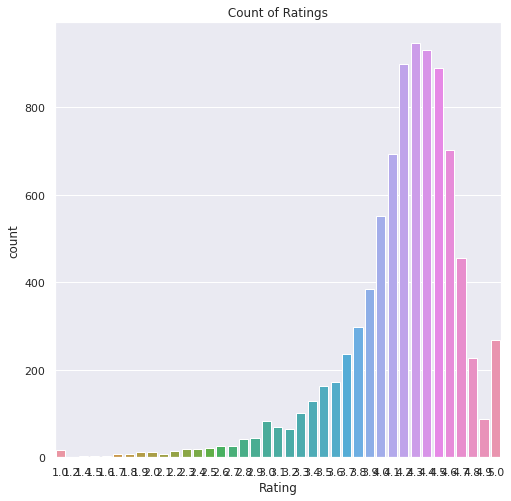

In [ ]:
rt_plot = sb.countplot(playstore_df['Rating'])
sb.set(rc={'figure.figsize':(10,10)})
plt.title(" Count of Ratings ")
plt.show()

**summery.1** - *as we can see from the above plot that the most apps are rated between 4 and 5 .*

### *there are also some apps , those are rated less than 3* .
### *maximun number of apps are rated between 4.3 and 4.5* .

## Adriod version supported apps 

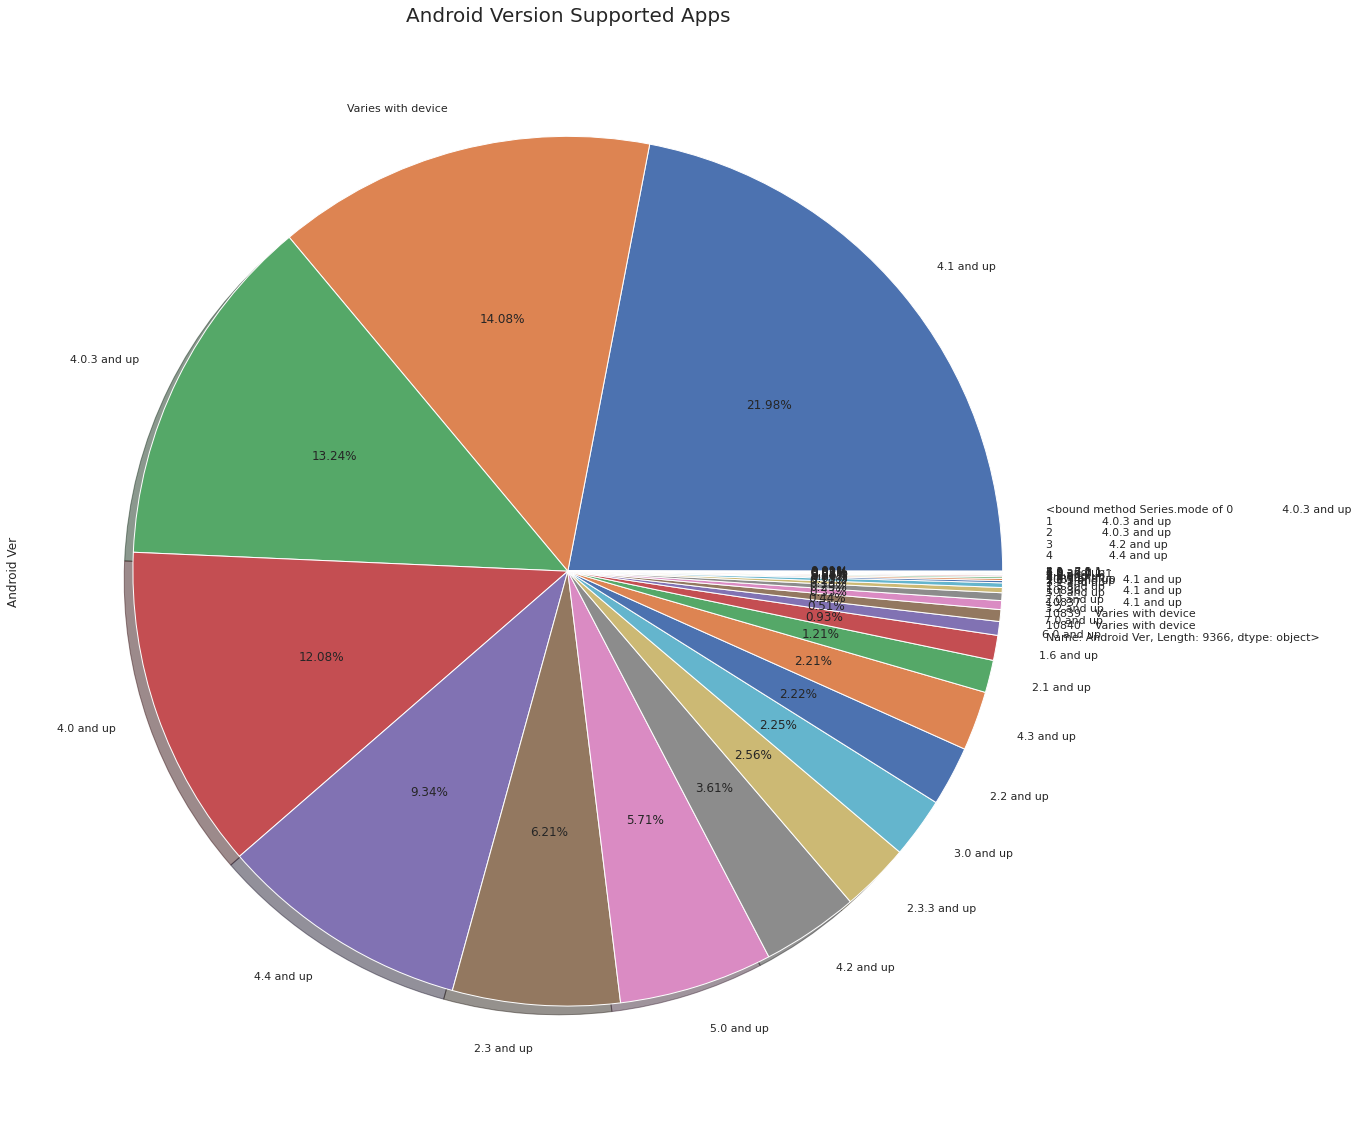

In [ ]:
plt.figure(figsize=(20,20))
count_AndroidVer.plot(kind = 'pie',  autopct='%1.02f%%', shadow=True)
plt.title('Android Version Supported Apps',size=20)
plt.show()

**Summary.2:** After identify total distibutation percentage on data,given details of more app supported Android OS versions.Basically android 4.0 and above version suppoeted app ratio is very higher and more then 60% app's support only on android 4.0 and above version

## What are the top content rating values ?

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


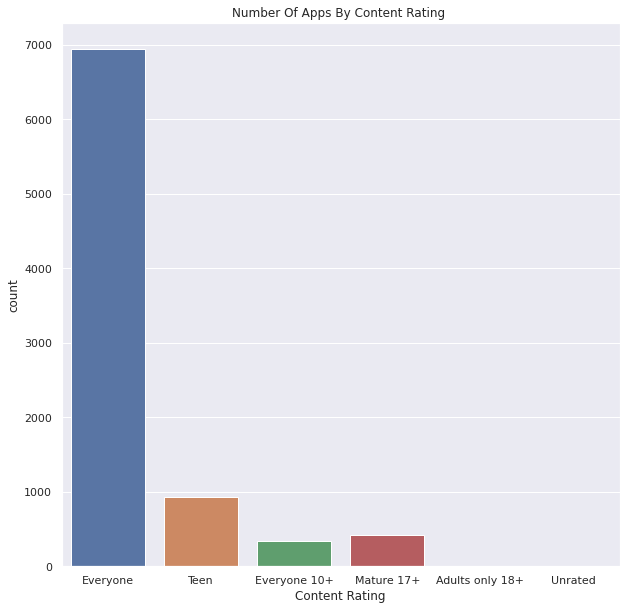

In [ ]:
ct_plot = sb.countplot(playstore_df["Content Rating"])
plt.title("Number Of Apps By Content Rating ")
sb.set (rc={'figure.figsize':(15,10)})
plt.show()

 are there any values with very few records ?


**summary.3**

maximum numbers of apps on the playstore are for 'Everyone' category.



as we can see there are some values like 'adults only 18+' and 'unrated'.





so, here we're  going to drop these values as they won't help in the analysis. 


In [ ]:
no_recs = playstore_df[playstore_df['Content Rating']== "Unrated"]
# at first we'll drop "unrated" values

In [ ]:
playstore_df=playstore_df.drop(no_recs.index)

In [ ]:
no_recs

App Category  Rating  Reviews    Size  Installs  \
8266  DC Universe Online Map    TOOLS     4.1   1186.0  6553.0   50000.0   

      Type  Price Content Rating Genres       Last Updated Current Ver  \
8266  Free    0.0        Unrated  Tools  February 27, 2012         1.3   

       Android Ver Last Update  
8266  2.3.3 and up  2012-02-27

In [ ]:
no_recs = playstore_df[playstore_df['Content Rating']=="Adults only 18+"]


In [ ]:
no_recs

App Category  Rating  Reviews  \
298   Manga Master - Best manga & comic reader   COMICS     4.6  24005.0   
3043         DraftKings - Daily Fantasy Sports   SPORTS     4.5  50017.0   
6424                               Manga Books   COMICS     3.8   7326.0   

         Size   Installs  Type  Price   Content Rating  Genres  \
298    5017.0   500000.0  Free    0.0  Adults only 18+  Comics   
3043  41984.0  1000000.0  Free    0.0  Adults only 18+  Sports   
6424  14336.0   500000.0  Free    0.0  Adults only 18+  Comics   

        Last Updated         Current Ver         Android Ver Last Update  
298     July 4, 2018             1.1.7.0          4.1 and up  2018-07-04  
3043   July 24, 2018            3.21.324          4.4 and up  2018-07-24  
6424  August 3, 2018  Varies with device  Varies with device  2018-08-03

In [ ]:
# as we can see here three raws has appear, which have this "Adults only 18+".
# so will drops these raws

playstore_df=playstore_df.drop(no_recs.index)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


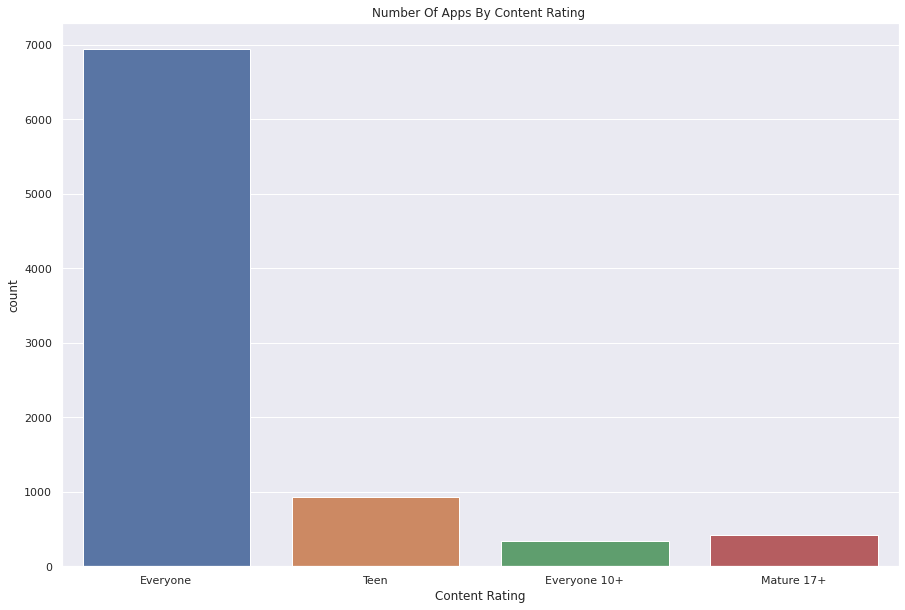

In [ ]:
ct_rt_plt= sb.countplot(playstore_df["Content Rating"])
plt.title("Number Of Apps By Content Rating ")
sb.set (rc={'figure.figsize':(15,10)})
plt.show()

## lets see that if size has affected the ratings.
**1.making a jointplot to see effect of size on rating**(with regrassion line)

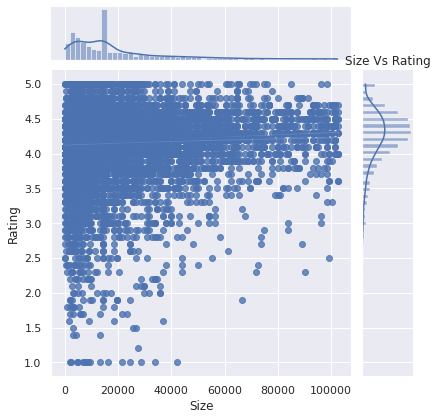

In [ ]:
plot=sb.jointplot(x=playstore_df['Size'],y=playstore_df['Rating'],kind="reg")
plt.title("Size Vs Rating",y=1.3)
plt.show()

**Is there any pattern visible?**

**summary.4** -the apps at the lower size are rated distributively.they also contributes to the lowest rated app while the apps of greater size are rated better as compared to the apps of small sizes.the frequency of the small apps is also way too high than the apps with large sizes. the maximum number of apps is around 20000 in size

the regrassion line shows an upward trend as the size of the app increases which shows that the apps with greater size provides better experience to users.

##Effect of Price on Rating

<function matplotlib.pyplot.show(*args, **kw)>

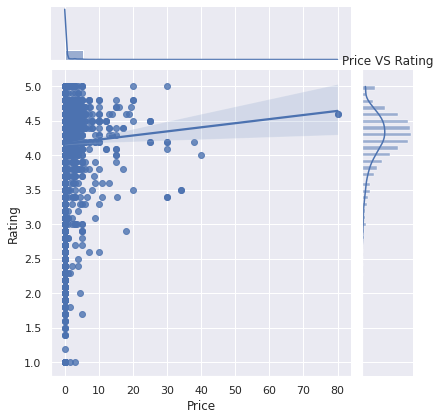

In [ ]:
sb.set(rc={'figure.figsize':(15,10)})
plot_g=p_vs_r_plt= sb.jointplot(x=playstore_df['Price'],y=playstore_df['Rating'],kind="reg")
plt.title("Price VS Rating", y=1.3)
plt.show

**what is the overall inference of price on rating ?**

**summary-5**the regrassion line shows an upward trend as the price gose up but there  are vary few apps with higher price but are rated very good. 

##lets have look on numeric intrection together :

<function matplotlib.pyplot.show(*args, **kw)>

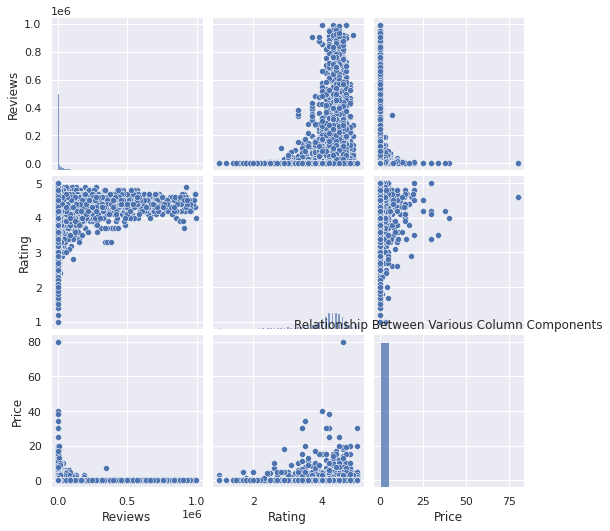

In [ ]:


int_plot = sb.pairplot(playstore_df[["Reviews","Rating","Price"]])
plt.title("Relationship Between Various Column Components", y=1.3) 
plt.show

## which category has highest numbers of installs ?

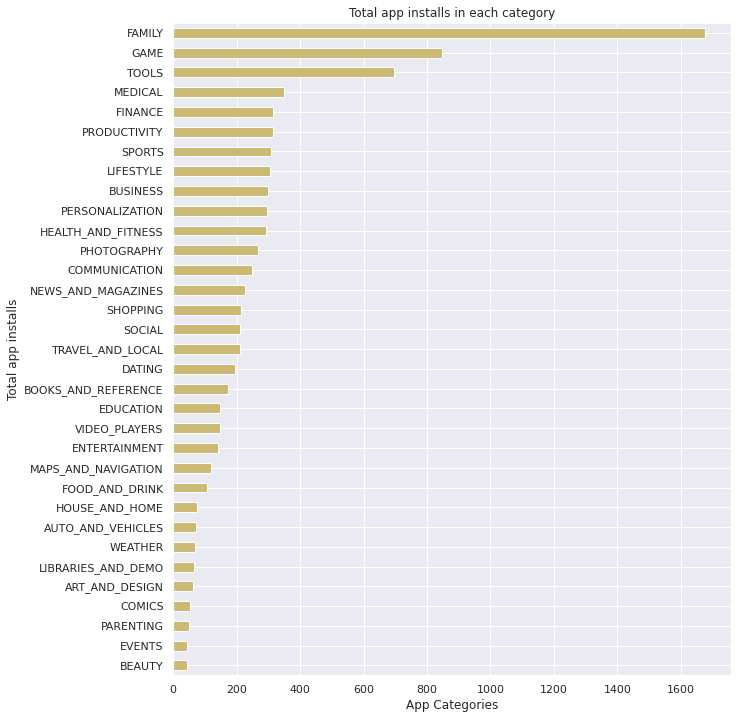

In [ ]:
playstore_df['Category'].value_counts().plot.barh(figsize=(10,12), color = 'y').invert_yaxis()
plt.ylabel('Total app installs')
plt.xlabel('App Categories')
plt.xticks()
plt.title('Total app installs in each category')
plt.show()

**Summary-6**as we can see from above plot that category named "family" has higest number of installs .
"Beauty" category has lowest installs

### ploting graph showing top category in playstore dataset

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


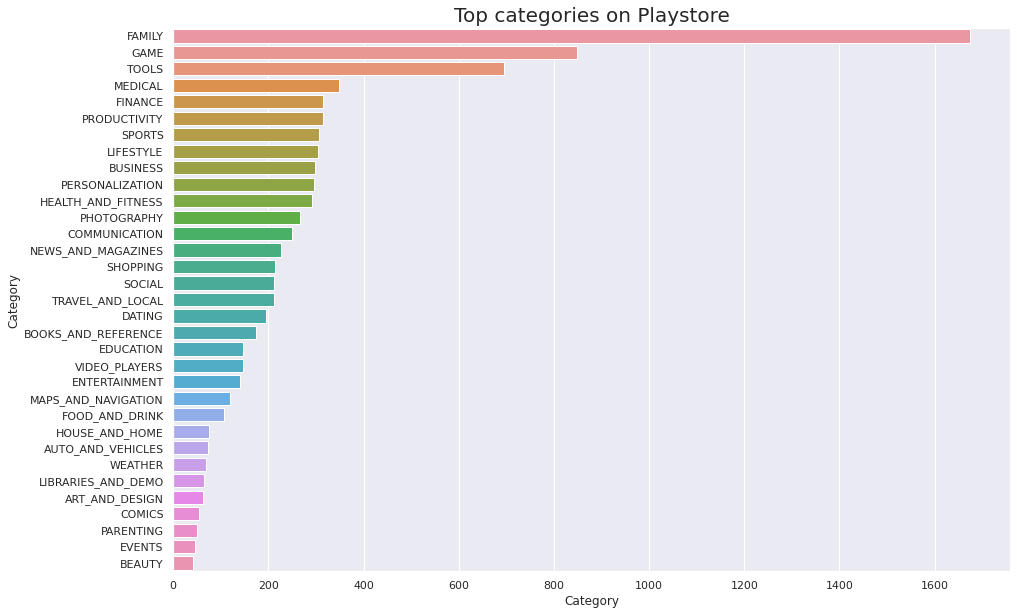

In [ ]:
plt.figure(figsize=(15,10))

y = playstore_df['Category'].value_counts().index
x = playstore_df['Category'].value_counts()
plt.xlabel("Count")
plt.ylabel("Category")
graph = sb.barplot(x, y)
graph.set_title("Top categories on Playstore", fontsize = 20);

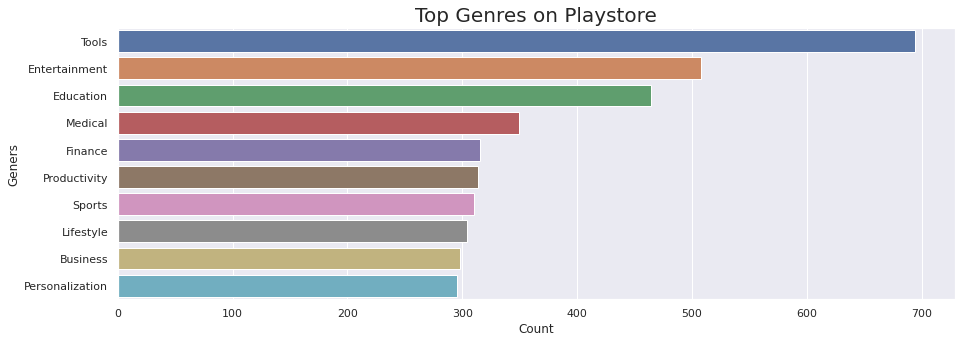

In [ ]:
y = playstore_df['Genres'].value_counts().index
x = playstore_df['Genres'].value_counts().head(10)
xsisG = []
ysisG = []
for i in range(len(x)):
    xsisG.append(x[i])
    ysisG.append(y[i])

plt.figure(figsize=(15,5))
plt.xlabel("Count")
plt.ylabel("Geners")

graph = sb.barplot(x = xsisG, y = ysisG,)
graph.set_title("Top Genres on Playstore", fontsize = 20);

on the given dataset of playstore genre of most apps are "Entertainment" and "Tools".

Text(0.5, 1.0, 'App pricing trend across popular categories')

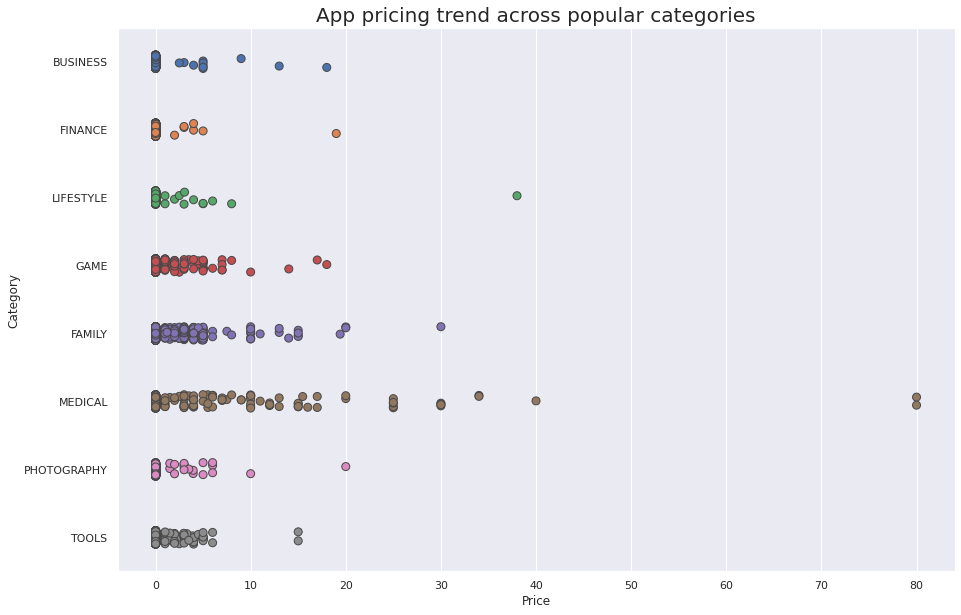

In [ ]:
plt.figure(figsize=(15,10))

# There are some popular app categories in given dataset
popular_app_cats = playstore_df[playstore_df.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY', 'MEDICAL', 'TOOLS', 'FINANCE','LIFESTYLE','BUSINESS'])]

# Examine the price trend by plotting Price vs Category
cate_plot = sb.stripplot(x = popular_app_cats['Price'], y = popular_app_cats['Category'], jitter=True, linewidth=1 , size=8)
cate_plot.set_title('App pricing trend across popular categories',size=20)

**summary- 7**

form the above plot we can say that the "MEDICAL" category and the "FAMILY"  category is more pricey than the others.

## paid and unpaid apps accross the playstore data

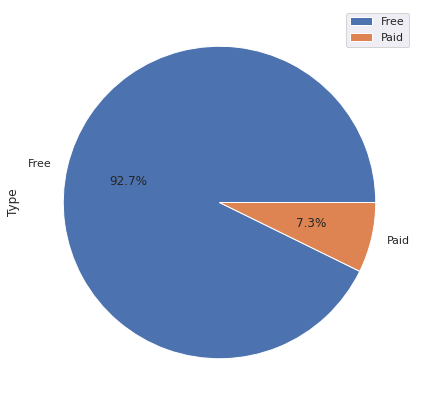

In [ ]:
playstore_df['Type'].value_counts().plot.pie(figsize = (7,15), autopct='%1.1f%%')
plt.legend()

**summary-8**according to plot 

                  92.7 % are unpaid.
                 
                  7.3  % are paid apps

## Rating between free apps and paid apps

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


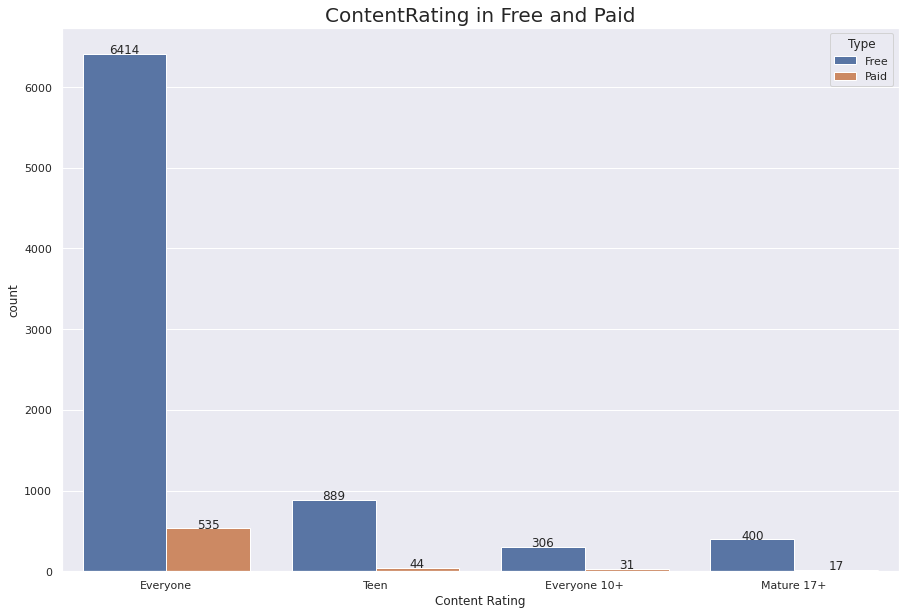

In [ ]:
plt.figure(figsize=(15,10))
rating_plt = sb.countplot(playstore_df['Content Rating'],hue=playstore_df['Type']);
plt.title("ContentRating in Free and Paid",size=20)

for p in rating_plt.patches:
    rating_plt.annotate(p.get_height(),(p.get_x() + p.get_width()/2,p.get_height()),ha='center',size= 12)
    
plt.show()


#Pivot Table
## Creating 5 bucket to plot a heatmap showing interaction between size and content rating
containing 20% records in each , based on size. 

In [ ]:
playstore_df['Size'].max()

102400.0

In [ ]:
playstore_df['Size'].min()

8.5

In [ ]:
np.percentile(playstore_df['Size'],20)

nan

In [ ]:
np.percentile(playstore_df['Size'],40)

nan

In [ ]:
np.percentile(playstore_df['Size'],60)

nan

In [ ]:
np.percentile(playstore_df['Size'],80)

nan

In [ ]:
interval = [0,4710,12288,15360,32768,102400]

In [ ]:
playstore_df["size_Bucket"]=pd.cut(playstore_df['Size'],interval,labels=["very small","small","medium","large","very large"])

In [ ]:
pd.pivot_table(playstore_df,values="Rating",index="size_Bucket",columns="Content Rating").round(2)

Content Rating  Everyone  Everyone 10+  Mature 17+  Teen
size_Bucket                                             
very small          4.12          4.19        3.95  4.22
small               4.16          4.21        4.13  4.21
medium              4.23          4.23        4.13  4.14
large               4.17          4.22        3.99  4.16
very large          4.19          4.22        4.19  4.25

## by containing rating vs sizebucket getting the rating 20 percentile for each combinaton

In [ ]:
table=pd.pivot_table(playstore_df,values="Rating",index="size_Bucket",columns="Content Rating",aggfunc=lambda x:np.percentile(x,20))

In [ ]:
table

Content Rating  Everyone  Everyone 10+  Mature 17+  Teen
size_Bucket                                             
very small           3.8          3.84        3.28  3.86
small                3.8          3.94        3.64  3.86
medium               4.0          4.00        4.00  3.90
large                3.9          4.00        3.68  4.00
very large           3.9          4.00        4.00  4.00

### Annotated

<function matplotlib.pyplot.show(*args, **kw)>

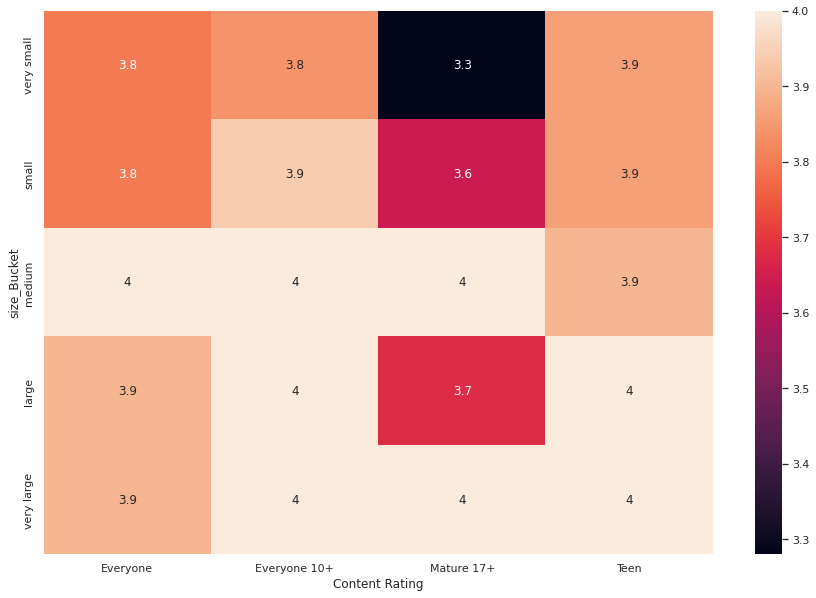

In [ ]:
sb.heatmap(table,annot=True)
sb.set(rc={'figure.figsize':(6,6)})
plt.show

### Green color map

<function matplotlib.pyplot.show(*args, **kw)>

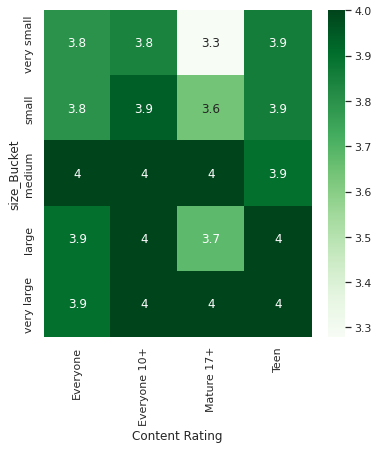

In [ ]:
sb.heatmap(table,annot=True,cmap='Greens')
sb.set(rc={'figure.figsize':(6,6)})
plt.show


**summary 8** -

the apps with size "large", "very large" and "medium" are rated good for category **"everyone 10+"** ,categoty **"Mature 10+"** and **"Teen"**.

although for other categories the rating is not bad for smaller size but especially in the category "mature 17+" only the apps with large size or very large size are preferred.*italicized text*

# Sentiment Data

## there is pie chart showing types of reviews across all the review dataset

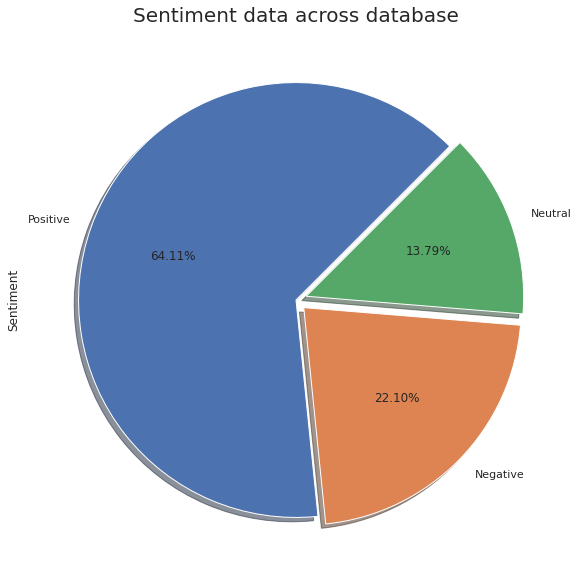

In [ ]:
plt.figure(figsize=(15,10))
pd.value_counts(user_review_df["Sentiment"]).plot(kind = 'pie',  autopct='%1.2f%%',shadow=True, explode=[0, 0.05, 0.05], startangle=45 )
plt.title("Sentiment data across database",size=20)
plt.show()

**Summary- 9** - 

as we can see from above plot there is 64 % positive feedbacks,
                                       14 % neutral feedbacks,
                                    &  22 % negative feedbacks.

### Merging both datsets

In [ ]:
merged_df = playstore_df.merge(user_review_df, on="App")
merged_df.info()
# here we merged both datasets for more analyisis 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84228 entries, 0 to 84227
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   App                     84228 non-null  object        
 1   Category                84228 non-null  object        
 2   Rating                  84228 non-null  float64       
 3   Reviews                 84228 non-null  float64       
 4   Size                    84228 non-null  float64       
 5   Installs                84228 non-null  float64       
 6   Type                    84228 non-null  object        
 7   Price                   84228 non-null  float64       
 8   Content Rating          84228 non-null  object        
 9   Genres                  84228 non-null  object        
 10  Last Updated            84228 non-null  object        
 11  Current Ver             84228 non-null  object        
 12  Android Ver             84228 non-null  object

### ploting a graph to know , which category has positive and negative feedbacks

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


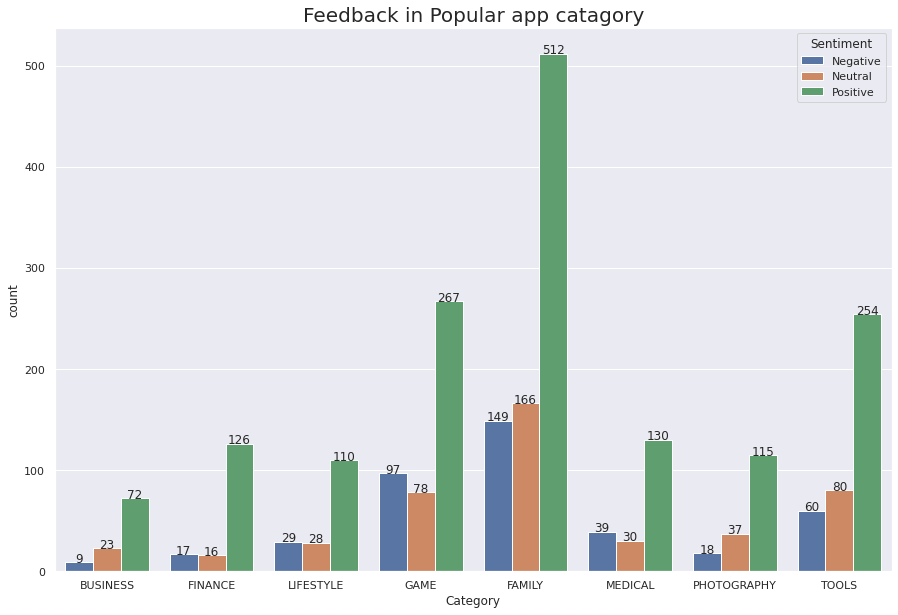

In [ ]:
plt.figure(figsize=(15,10))
ax = sb.countplot(popular_app_cats['Category'],hue=merged_df['Sentiment']);
plt.title("Feedback in Popular app catagory",size=20)

for p in ax.patches:
    ax.annotate(p.get_height(),(p.get_x() + p.get_width()/2,p.get_height()),ha='center',size= 12)
    
plt.show()

**summary-10** 

as we already know that "family" category has the most numbers of installs.
so family category contains highest numbers of positive feedbacks and also negatives.